# Ploting and Visualization

> Making plots and static or interactive visualizations is one of the most important tasks
in data analysis. It may be a part of the exploratory process; for example, helping iden-
tify outliers, needed data transformations, or coming up with ideas for models. For
others, building an interactive visualization for the web using a toolkit like d3.js (http:
//d3js.org/) may be the end goal. Python has many visualization tools (see the end of
this chapter), but I’ll be mainly focused on matplotlib (http://matplotlib.sourceforge
.net).


> matplotlib is a (primarily 2D) desktop plotting package designed for creating publica-
tion-quality plots. The project was started by John Hunter in 2002 to enable a MAT-
LAB-like plotting interface in Python. He, Fernando Pérez (of IPython), and others have
collaborated for many years since then to make IPython combined with matplotlib a
very functional and productive environment for scientific computing. When used in
tandem with a GUI toolkit (for example, within IPython), matplotlib has interactive
features like zooming and panning. It supports many different GUI backends on all
operating systems and additionally can export graphics to all of the common vector
and raster graphics formats: PDF, SVG, JPG, PNG, BMP, GIF, etc. I have used it to
produce almost all of the graphics outside of diagrams in this book.

> matplotlib has a number of add-on toolkits, such as mplot3d for 3D plots and basemap
for mapping and projections. I will give an example using basemap to plot data on a map
and to read shapefiles at the end of the chapter.

> To follow along with the code examples in the chapter, make sure you have started
IPython in Pylab mode ( ipython --pylab ) or enabled GUI event loop integration with
the %gui magic.

Overview:
* A brief matplotlib API Primer
* Plotting Functions in pandas
* Plotting Maps: Visualizing Haiti Earthquake Crisis Data
* Python Visualization Tool Ecosystem

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Test if matplotlib is running

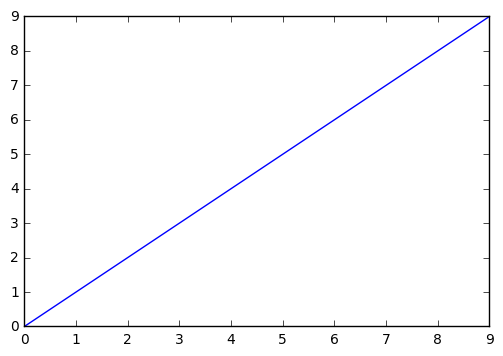

In [69]:
plt.plot(np.arange(10))

## Figures and Subplots

**Figures** Plots in matplotlib reside within a **Figure** object.

We can use in **ipython --pylab**

In [70]:
fig = plt.figure()

In [71]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

After adding subplot, if we add anything, it will be displayed in the last plot

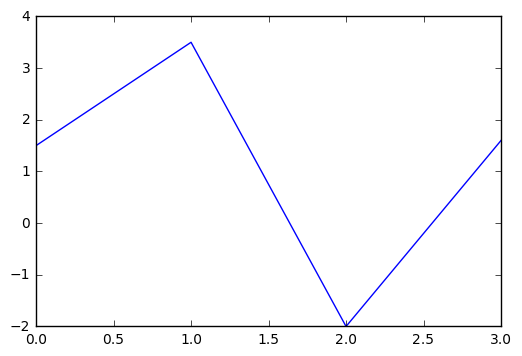

In [73]:
plt.plot([1.5, 3.5, -2, 1.6])

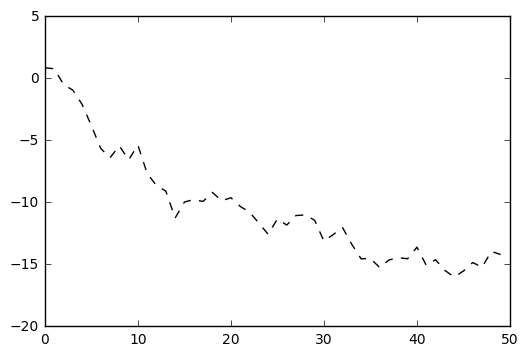

In [74]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

We can add plot to specify sub plot. 

In [75]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [76]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

We can find more plot types in this document: http://matplotlib.org/gallery.html

**plt.subplots**, that creates a new figure and returns a NumPy array containing the created subplot objects:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a8d6e610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a8955150>]], dtype=object)

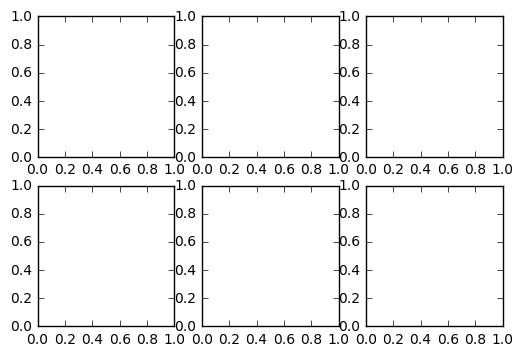

In [77]:
fig, axes = plt.subplots(2, 3)
axes

**Adjusting the spacing around subplots**

We can setup the adjust of plot by using **subplots_adjust** method

In [78]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

**wspace** and **hspace** controls the percent of the figure width and figure height

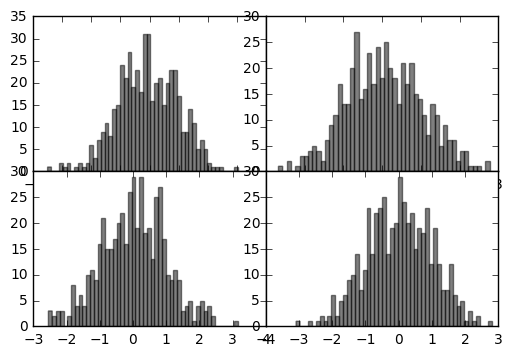

In [79]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

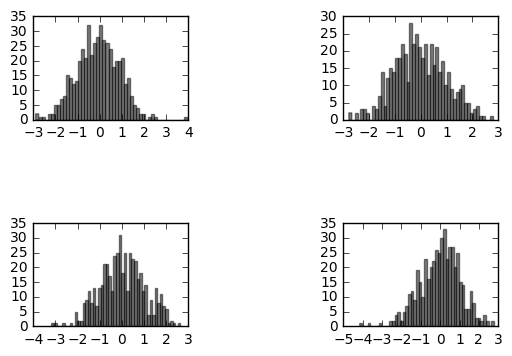

In [80]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=1, hspace=1)

## Colors, Markers, and Line Styles

**Color**

Color can be modified by using option **color='(color_allias)--'**

In [81]:
plt.figure()

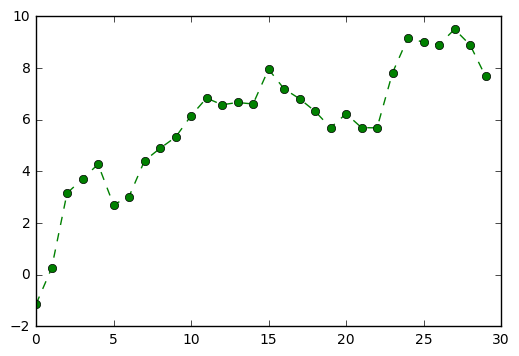

In [82]:
plt.plot(randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

Or simpler:

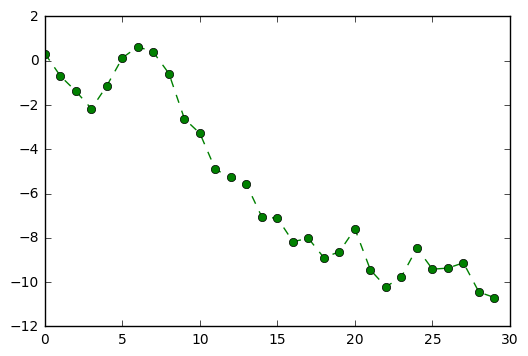

In [83]:
plt.plot(randn(30).cumsum(), 'go--')

For **line plots**, you will notice that subsequent points are **linearly interpolated by default**. This can be altered with the **drawstyle** option:

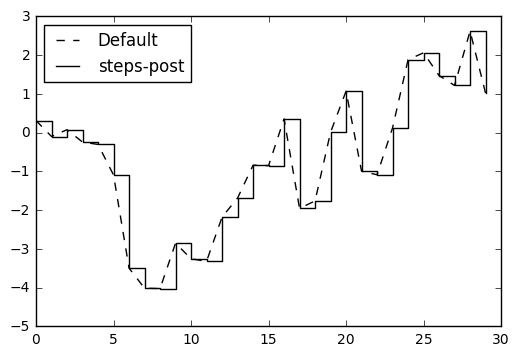

In [84]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

**set_xticks** to set the coodinate of tick

**set_xticklabels** to set name and format to the ticks has been set coodinate

**set_title** to set name of the subplot

**set_xlabel** to set label to subplot

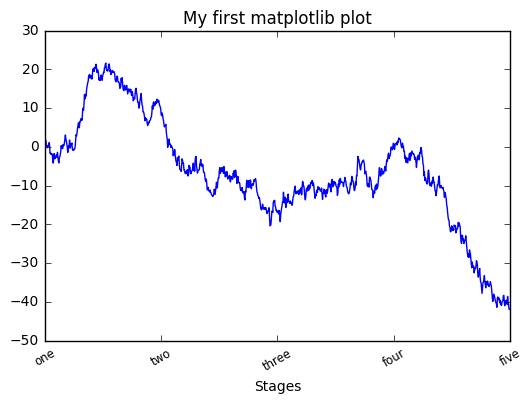

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding Legends

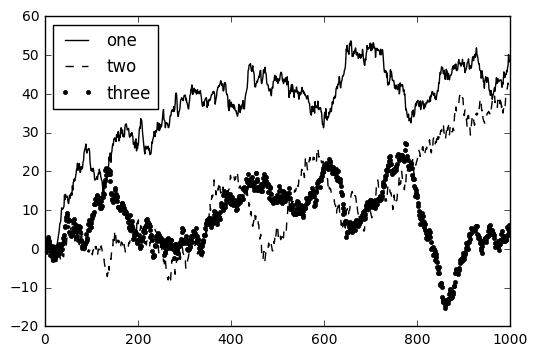

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

## Annotations and Drawing on a Subplot

We can draw a text into a plot

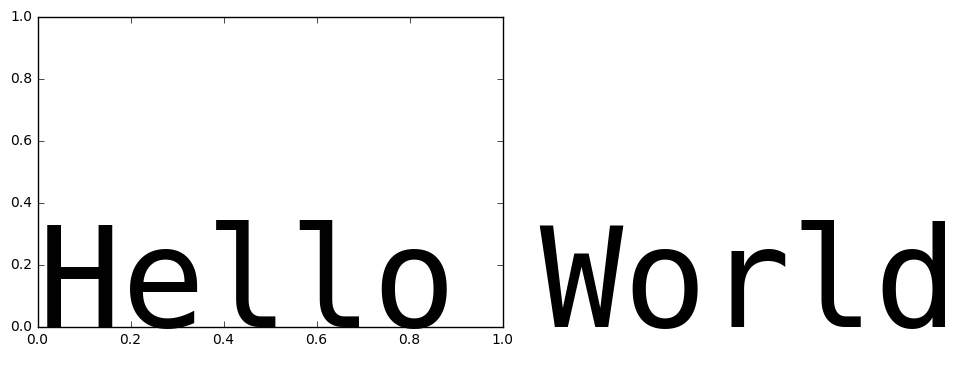

In [138]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.text(0, 0, "Hello World", family='monospace', fontsize=100)

Annotations can draw both text and arrows arranged appropriately.

For example we have a data of S&P 500 index from 1990 to 2011

**anonotate**

In [121]:
plt.close('all')

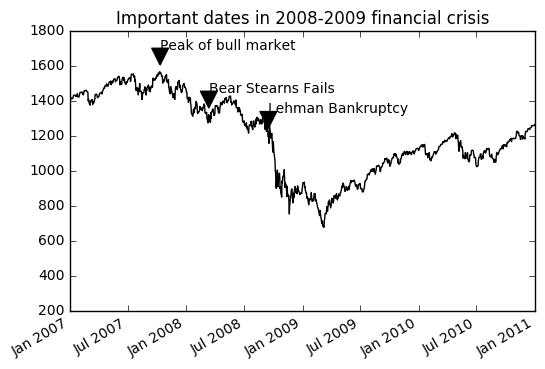

In [135]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([200, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

**Drawing shapes**

First we can create some objects about the shape like: Retangle, Circle, Polygon 
    
Then add them to plot

<class 'matplotlib.patches.Rectangle'> <class 'matplotlib.patches.Circle'>


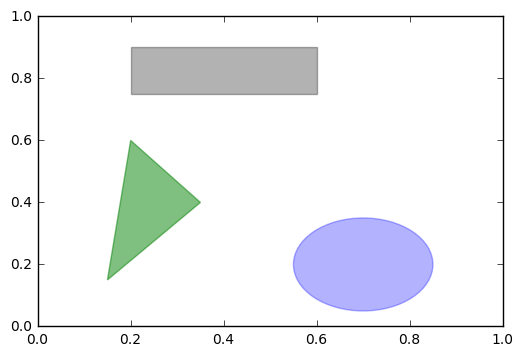

In [140]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
print type(rect), type(circ)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Saving Plots to File

The current figure can be saved to file.

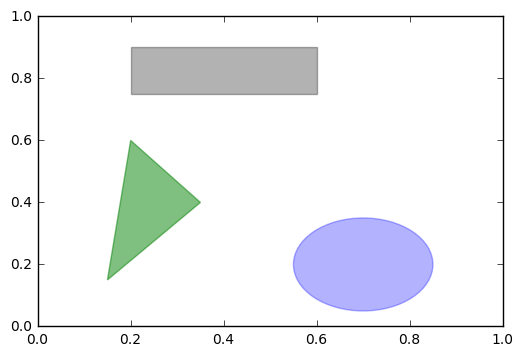

In [142]:
fig

In [143]:
fig.savefig('data/shapes.svg')

Or we can save into a png image:

In [145]:
fig.savefig('data/shapes.png', DPI=400, bbox_inches='tight')

**savefig** does not have to write to disk, it can be saved in an object

In [151]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## matplotlib Configuration

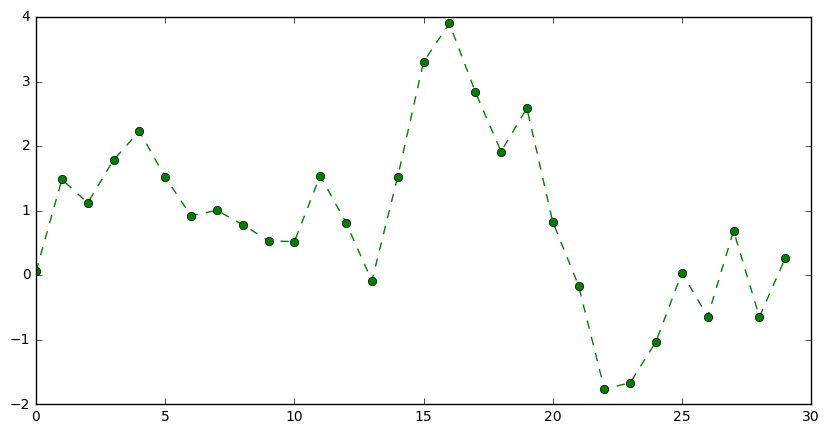

In [162]:
plt.rc('figure', figsize=(10, 5))
plt.figure()
plt.plot(randn(30).cumsum(), 'go--')

We can use a dict as an configuration:

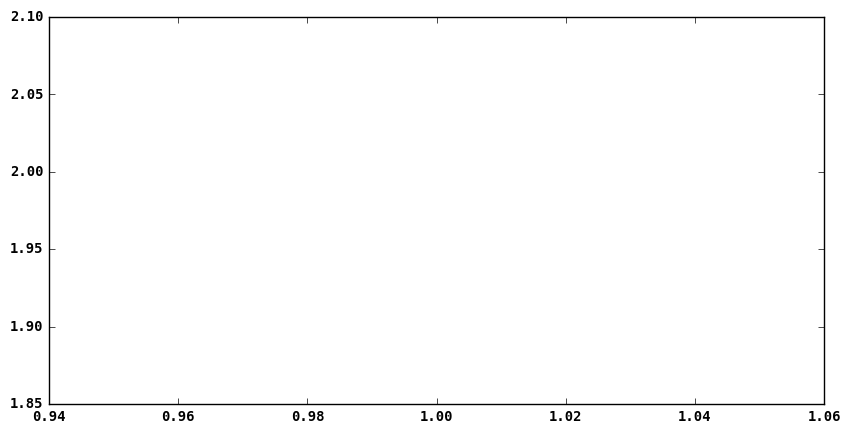

In [176]:
font_options = {
    'family' : 'monospace',
    'weight' : 'bold',
    'size': 10
}
plt.rc('font', **font_options)
plt.plot(1, 2)

# Plotting Functions in pandas

As you’ve seen, matplotlib is actually a fairly low-level tool. You assemble a plot from
its base components: the data display (the type of plot: line, bar, box, scatter, contour,
etc.), legend, title, tick labels, and other annotations

Pandas has an increasing number of high-level plotting methods for creating standard visual-
izations that take advantage of how data is organized in DataFrame objects.

### Line plots

Series and DataFrame each have a plot method for making many different plot types.
By default, they make line plots

In [180]:
plt.close('all')
plt.rcdefaults()

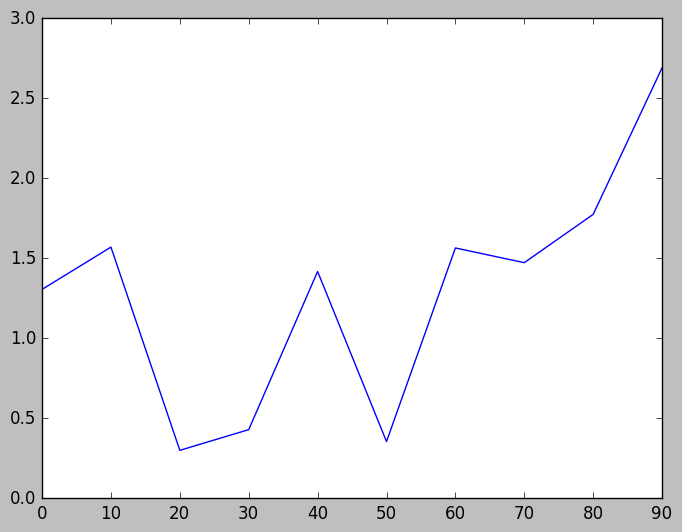

In [181]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

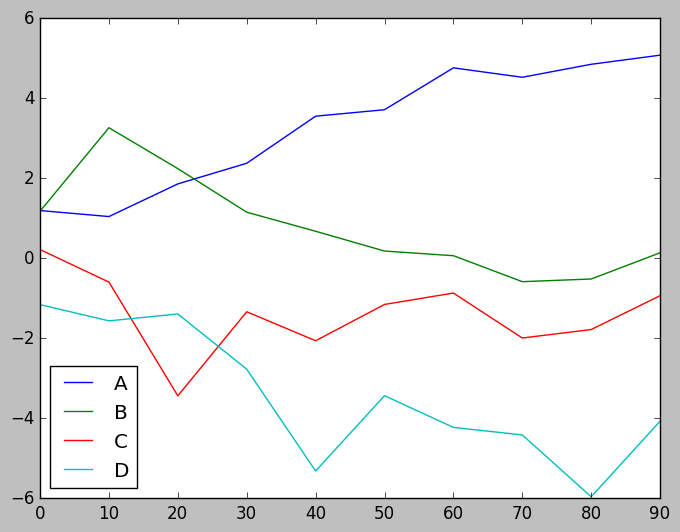

In [183]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

## Bar plot

Making bar plots instead of line plots is a simple as passing **kind='bar'** (for vertical
bars) or **kind='barh'** (for horizontal bars). In this case, the Series or DataFrame index
will be used as the X ( bar ) or Y ( barh ) ticks

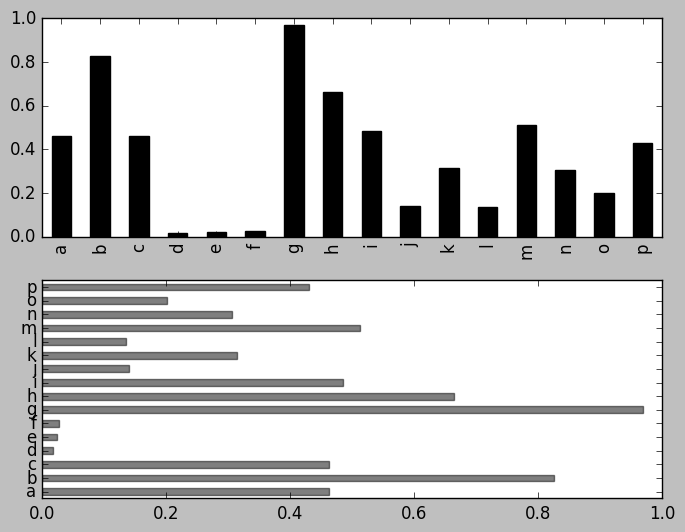

In [188]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=1)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.5)

With a DataFrame, bar plots group the values in each row together in a group in bars,
side by side, for each value

In [192]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.646264,0.165766,0.473877,0.745088
two,0.550441,0.697112,0.507811,0.419040
three,0.134105,0.116141,0.973960,0.475027
four,0.882443,0.976614,0.169887,0.082181
five,0.012511,0.477434,0.483967,0.307598
six,0.474690,0.071069,0.211727,0.326585


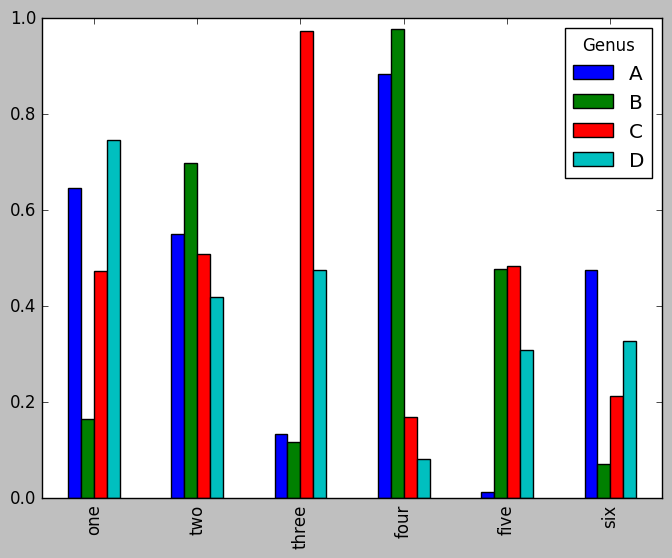

In [196]:
df.plot(kind='bar', stacked=False)

We change **stacked=True**

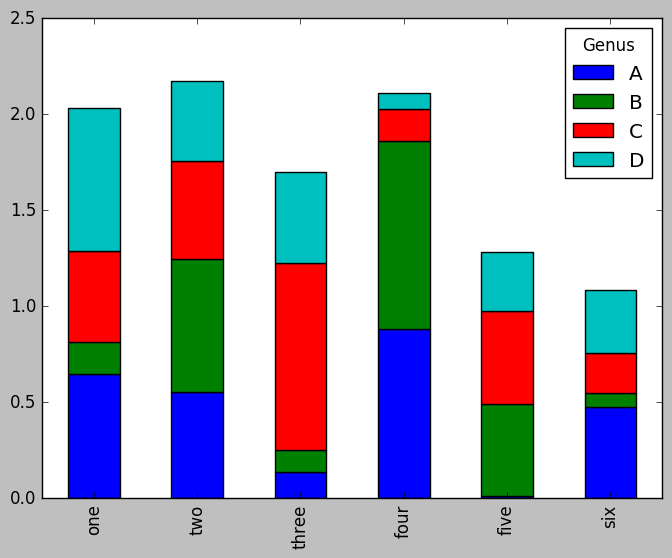

In [198]:
df.plot(kind='bar', stacked=True)

Returning to the tipping data set used earlier in the book, suppose we wanted to make
a stacked bar plot showing the percentage of data points for each party size on each
day. I load the data using read_csv and make a cross-tabulation by day and party size

In [200]:
tips = pd.read_csv('data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [207]:
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [209]:
party_counts = party_counts.ix[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Then we calculate the percent of each level party in each day

In [210]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


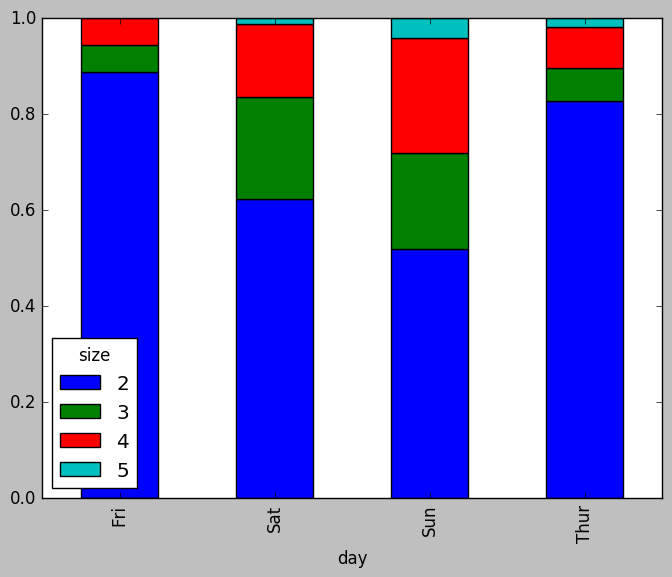

In [211]:
party_pcts.plot(kind='bar', stacked=True)

## Histograms and Density Plots

A histogram, with which you may be well-acquainted, is a kind of bar plot that gives a
discretized display of value frequency. The data points are split into discrete, evenly
spaced bins, and the number of data points in each bin is plotted.

In [212]:
plt.figure()

Using the tipping
data from before, we can make a histogram of tip percentages of the total bill using the
hist method on the Series

In [214]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


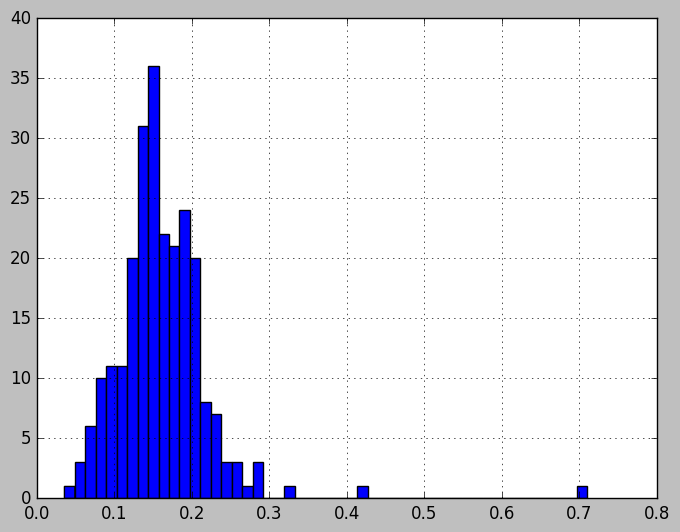

In [218]:
tips['tip_pct'].hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. A
usual procedure is to approximate this distribution as a mixture of kernels , that is,
simpler distributions like the normal (Gaussian) distribution. Thus, density plots are
also known as **KDE (kernel density estimate)** plots. Using plot with **kind='kde'** makes
a density plot using the standard mixture-of-normals KDE

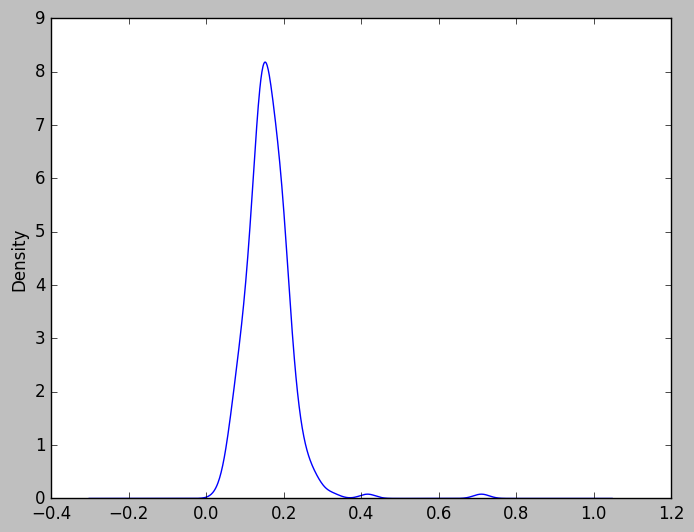

In [219]:
plt.figure()
tips['tip_pct'].plot(kind='kde')

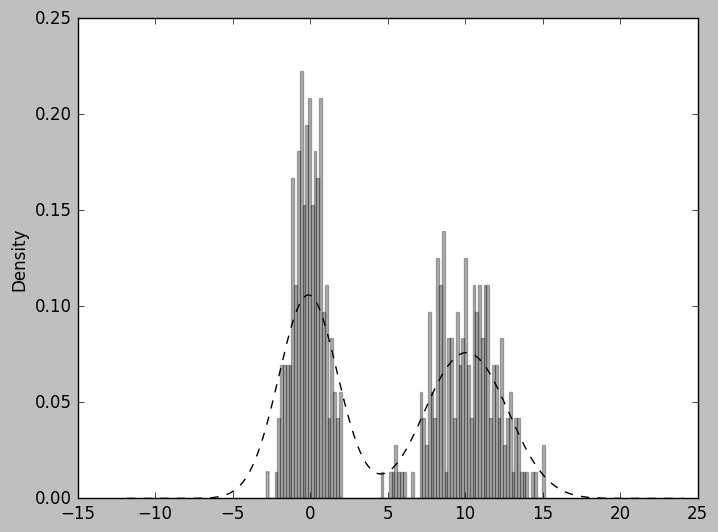

In [222]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

## Scatter Plots

Scatter plots are a useful way of examining the relationship between two one-dimensional data series. matplotlib has a scatter plotting method that is the workhorse of making these kinds of plots. To give an example, I load the macrodata dataset from the stats models project, select a few variables, then compute log differences:

In [224]:
macro = pd.read_csv('data/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [225]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


It’s easy to plot a simple scatter plot using **plt.scatter**

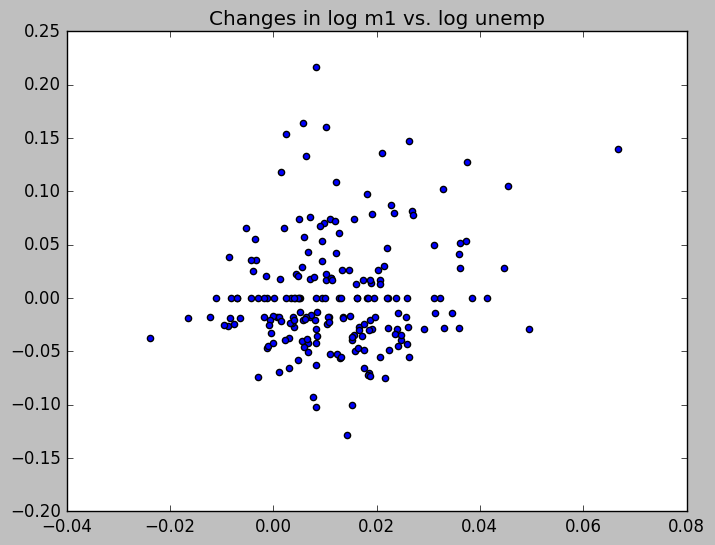

In [226]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe095167910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe093f8aad0>]], dtype=object)

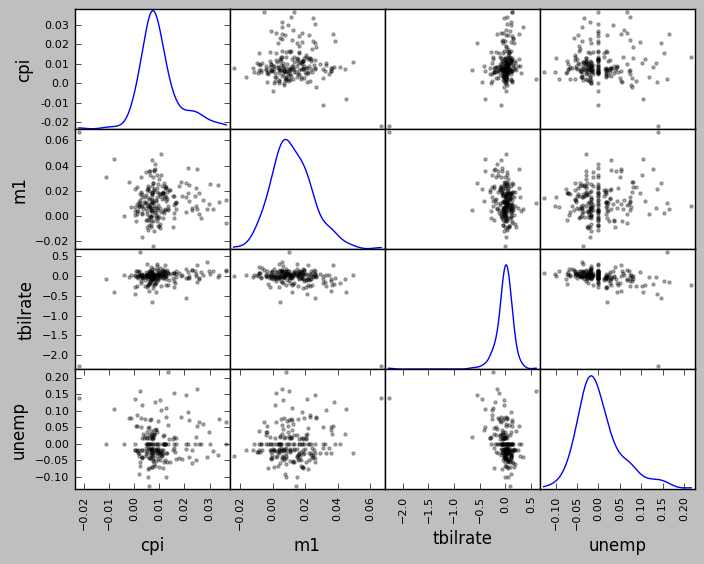

In [229]:
pd.scatter_matrix(trans_data, diagonal='kde', c='k', alpha=0.3)

# Plotting Maps: Visualizing Haiti Earthquake Crisis Data

**Ushahidi** is a non-profit software company that enables crowdsourcing of information
related to natural disasters and geopolitical events via text message:

In [231]:
data = pd.read_csv('data/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [232]:
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [233]:
data['CATEGORY']

0             1. Urgences | Emergency, 3. Public Health, 
1       1. Urgences | Emergency, 2. Urgences logistiqu...
2       2. Urgences logistiques | Vital Lines, 8. Autr...
3                               1. Urgences | Emergency, 
4                               1. Urgences | Emergency, 
5                          5e. Communication lines down, 
6       4. Menaces | Security Threats, 4e. Assainissem...
7                         4. Menaces | Security Threats, 
8       2. Urgences logistiques | Vital Lines, 2f. San...
9       2. Urgences logistiques | Vital Lines, 2d. Ref...
10      1a. Highly vulnerable, 2. Urgences logistiques...
11      4. Menaces | Security Threats, 4e. Assainissem...
12      2. Urgences logistiques | Vital Lines, 2d. Ref...
13      2. Urgences logistiques | Vital Lines, 2b. Pen...
14                                     3. Public Health, 
15                2. Urgences logistiques | Vital Lines, 
16      1. Urgences | Emergency, 7. Secours | Services...
17            

Additionally, calling describe shows that there
are some aberrant locations

In [234]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


As you see, the location has some aberrant ones, so we should remove them.

In [236]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [237]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


Now we might want to do some analysis or visualization of this data by category, but
each category field may have multiple categories. Additionally, each category is given
as a code plus an English and possibly also a French code name. Thus, a little bit of
wrangling is required to get the data into a more agreeable form. First, I wrote these
two functions to get a list of all the categories and to split each category into a code and
an English name:

In [238]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [239]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

Now, I make a dict mapping code to name because we’ll use the codes for analysis.
We’ll use this later when adorning plots (note the use of a generator expression in lieu
of a list comprehension):

In [241]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

There are many ways to go about augmenting the data set to be able to easily select
records by category. One way is to add indicator (or dummy) columns, one for each
category. To do that, first extract the unique category codes and construct a DataFrame
of zeros having those as its columns and the same index as data :

In [242]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)
dummy_frame

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As you recall, the trick is then to set the appropriate entries of each row to 1, lastly
joining this with data :

In [243]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [244]:
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
